- Smayan Kulkarni
- D100
- 60009230142
- D2-2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])
initial_w = 0.8
initial_b = -0.5
epochs = 50
learning_rate = 0.1

In [5]:
w = initial_w
b = initial_b
mse_bgd = []

for epoch in range(epochs):
    y_pred = w * X + b
    error = y_pred - Y
    mse = np.mean(error**2)
    mse_bgd.append(mse)
    grad_w = np.mean(error * X)
    grad_b = np.mean(error)
    w = w - learning_rate * grad_w
    b = b - learning_rate * grad_b

print(f"BGD Final Results: w = {w:.4f}, b = {b:.4f}")   

BGD Final Results: w = 0.4346, b = -0.1442


In [6]:
w = initial_w
b = initial_b
mse_sgd = []

for epoch in range(epochs):
    for i in range(len(X)):
        y_pred = w * X[i] + b
        error = y_pred - Y[i]
        total_mse = np.mean((w * X + b - Y)**2)
        mse_sgd.append(total_mse)
        grad_w = error * X[i]
        grad_b = error
        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b
        
print(f"SGD Final Results: w = {w:.4f}, b = {b:.4f}")

SGD Final Results: w = 0.3669, b = -0.0143


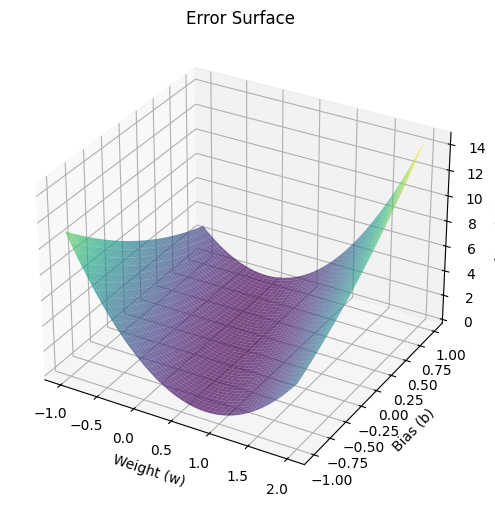

In [7]:
def loss_function(w, b, X, Y):
    y_pred = w * X[:, np.newaxis, np.newaxis] + b
    return np.mean((y_pred - Y[:, np.newaxis, np.newaxis])**2, axis=0)

w_range = np.linspace(-1, 2, 50)
b_range = np.linspace(-1, 1, 50)
W, B = np.meshgrid(w_range, b_range)
L = loss_function(W, B, X, Y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, L, cmap='viridis', alpha=0.7)
ax.set_title('Error Surface')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Loss (MSE)')
plt.show()

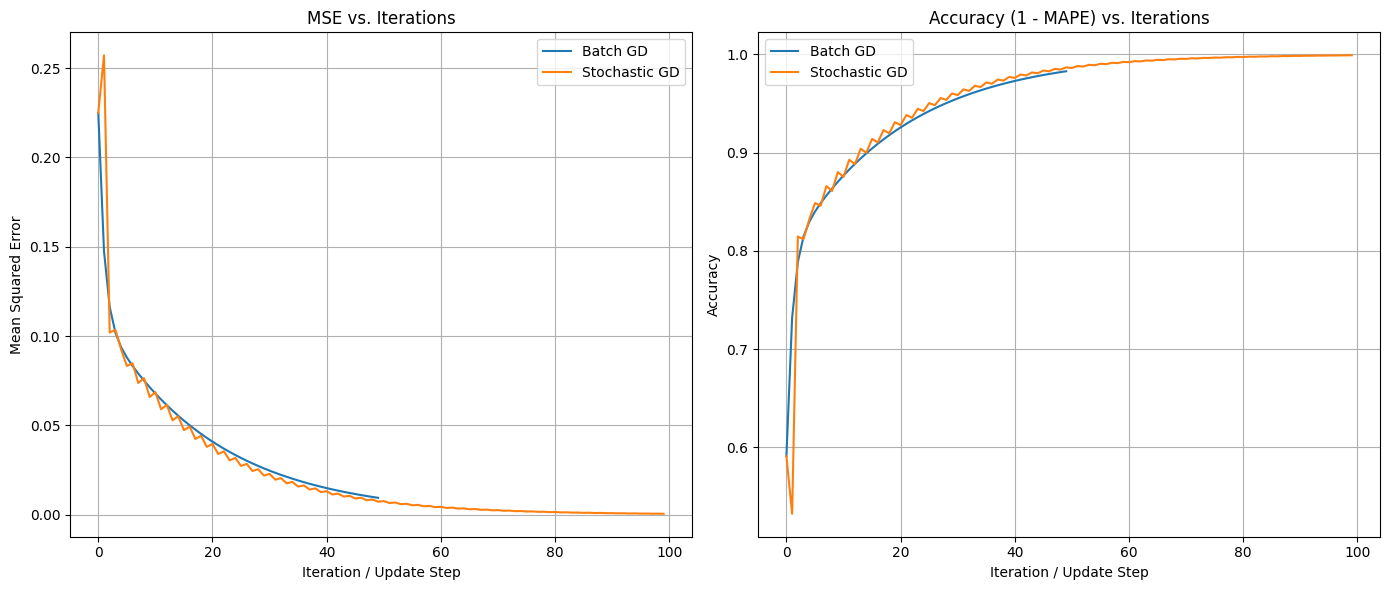

In [8]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(len(mse_bgd)), mse_bgd, label='Batch GD')
plt.plot(range(len(mse_sgd)), mse_sgd, label='Stochastic GD')
plt.title('MSE vs. Iterations')
plt.xlabel('Iteration / Update Step')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)

mape_bgd = 1 - (np.abs(mse_bgd) / np.mean(Y))
mape_sgd = 1 - (np.abs(mse_sgd) / np.mean(Y))

plt.subplot(1, 2, 2)
plt.plot(range(len(mape_bgd)), mape_bgd, label='Batch GD')
plt.plot(range(len(mape_sgd)), mape_sgd, label='Stochastic GD')
plt.title('Accuracy (1 - MAPE) vs. Iterations')
plt.xlabel('Iteration / Update Step')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Describe the meaning of the experiment and the implications of your results.

This experiment demonstrates the fundamental concept of training a model through optimization. The 

delta learning rule provides the mathematical basis for adjusting the model's parameters (weights and bias) to minimize error. The goal is to navigate the "error surface" to find the lowest point, which represents the best possible model for the given data.

The key implications come from comparing the two optimization methods:

  -  Batch Gradient Descent (BGD) is stable and reliable. Its smooth descent on the error plot shows that it takes a well-calculated step towards the minimum every time. However, because it must look at every single piece of data before making one update, it would be very slow on large datasets.

  - Stochastic Gradient Descent (SGD) is faster and more computationally efficient per update. Its noisy, zig-zagging path on the error plot shows that it's taking rougher guesses based on limited information (a single data point). This noisiness can sometimes be an advantage in more complex problems, as it might help the algorithm avoid getting stuck in suboptimal solutions (local minima).

Ultimately, this experiment shows the trade-off between computational cost and convergence stability, which is a central challenge in machine learning. This has led to the widespread adoption of Mini-Batch Gradient Descent, which offers a balance between the stability of BGD and the efficiency of SGD.